Text(0.5, 1.0, 'AAPL Trades By Feed')

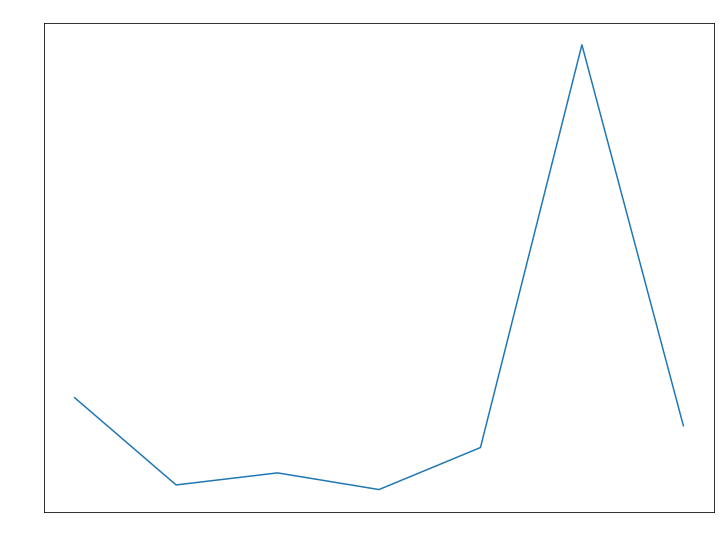

In [2]:
import maystreet_data

import matplotlib
import matplotlib.pyplot as plt

# Initialise our plotting parameters.
plt.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                     'xtick.color' : "white",
                     'ytick.color' : "white"})

# Set the output size for the figure
plt.rcParams["figure.figsize"] = (12, 9)

# Obtain the total number of traders for AAPL per venue for the 07-January-2022. You may
# alter the year, month and day values below to retrieve data, but please note the results may be different
# or absent if you are not entitled to access the feeds.
records_iter = maystreet_data.query(
    maystreet_data.DataSource.DATA_LAKE,
    """
    SELECT DISTINCT feed, COUNT(*) AS "cnt" FROM "prod_lake.p_mst_data_lake".mt_trade
    WHERE product = 'AAPL'
    AND "year" = '2022'
    AND "month" = '01'
    AND "day" = '07'
    GROUP BY feed
    ORDER BY feed
""",
)

# Iterate over the results, appending the feed and the count to the X and Y arrays.
x = []
y = []
for record in records_iter:
    x.append(record['feed'])
    y.append(record['cnt'])
plt.plot(x, y)

# Set the titles and axis labels.
plt.xlabel('Feed')
plt.ylabel('Total Trades')

plt.title('AAPL Trades By Feed')
